In [2]:
import pandas as pd
data=pd.read_csv('movie_review_merge.csv')

In [3]:
data=data.drop(['Unnamed: 0','Unnamed: 0.1','0'],axis=1)
data

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful,title,title_l,word_num
0,rw5704482,raeldor-96879,After Life (2019– ),9.0,Very Strong Season 2,3 May 2020,0,"I enjoyed the first season, but I must say I t...","['1', '1']",After Life,afterlife,87
1,rw5704512,lizadeegan,After Life (2019– ),10.0,A work of pure genius,3 May 2020,0,I love everything about this show. I thought t...,"['3', '3']",After Life,afterlife,128
2,rw5704521,NinnaMali97,After Life (2019– ),9.0,Authentic,3 May 2020,0,Simple and relatable with the right amount of ...,"['1', '1']",After Life,afterlife,34
3,rw5704579,dimitardimitrov-47886,After Life (2019– ),10.0,Brilliant,3 May 2020,0,Absolutely fantastic-really lovely.\nLove it\n...,"['3', '3']",After Life,afterlife,12
4,rw5704588,josh-29279,After Life (2019– ),10.0,Awesome production,3 May 2020,0,"The best viewing I've had in long time, so wel...","['3', '3']",After Life,afterlife,18
...,...,...,...,...,...,...,...,...,...,...,...,...
2958348,rw0870781,alexis-debontoulouse,Toutes les filles sont folles (2003),9.0,unseen French zaniness,14 May 2003,0,"I see about every film that comes out, and I h...","['1', '2']",Toutes les filles sont folles,touteslesfillessontfolles,52
2958349,rw0870782,LAROCHE,Toutes les filles sont folles (2003),6.0,Simple and delicious,20 May 2003,0,It is a delicious comedy about finding your tr...,"['3', '4']",Toutes les filles sont folles,touteslesfillessontfolles,181
2958350,rw0874288,boudu_sauve_des_eaux,Balnearios (2002),NaN,Home by the sea,31 January 2003,1,minor spoilers herein.This movie is a document...,"['9', '9']",Balnearios,balnearios,357
2958351,rw0876737,Pedro-37,Hum Kisi Se Kum Nahin (2002),6.0,"Entertaining copy of ""Analyze This""",19 January 2003,0,"""Hum Kisi Se Kum Nahin"" is an entertaining cop...","['7', '15']",Hum Kisi Se Kum Nahin,humkisisekumnahin,309


In [3]:
#
data['rating'].isnull().sum()

397669

In [4]:
data['review_detail'].isnull().sum()

1

In [5]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
data['review_detail'] = data['review_detail'].astype("str")
SIA = SentimentIntensityAnalyzer()
data['sentiment_score']=data.review_detail.apply(lambda x:SIA.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\qinpei\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
data.head()

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful,title,title_l,word_num,sentiment_score
0,rw5704482,raeldor-96879,After Life (2019– ),9.0,Very Strong Season 2,3 May 2020,0,"I enjoyed the first season, but I must say I t...","['1', '1']",After Life,afterlife,87,0.9916
1,rw5704512,lizadeegan,After Life (2019– ),10.0,A work of pure genius,3 May 2020,0,I love everything about this show. I thought t...,"['3', '3']",After Life,afterlife,128,0.9756
2,rw5704521,NinnaMali97,After Life (2019– ),9.0,Authentic,3 May 2020,0,Simple and relatable with the right amount of ...,"['1', '1']",After Life,afterlife,34,0.9166
3,rw5704579,dimitardimitrov-47886,After Life (2019– ),10.0,Brilliant,3 May 2020,0,Absolutely fantastic-really lovely.\nLove it\n...,"['3', '3']",After Life,afterlife,12,0.9089
4,rw5704588,josh-29279,After Life (2019– ),10.0,Awesome production,3 May 2020,0,"The best viewing I've had in long time, so wel...","['3', '3']",After Life,afterlife,18,0.7870


In [26]:
#calculate a average value for each movie
senti=data.groupby('title')['sentiment_score'].mean()

In [33]:
senti.to_csv('sentiment_score.csv')

In [27]:
data_movie=pd.read_csv('movie_variable_full.csv')

In [29]:
dataf=data_movie.merge(senti,left_on='primaryTitle',right_on='title',how='inner')

In [49]:
dataf1=dataf.drop_duplicates(['primaryTitle'])

In [53]:
dataf1=dataf1[['primaryTitle','sentiment_score']]
dataf1.to_csv('sentiment_score.csv')

#### LDA

In [1]:
import pandas as pd
data_review=pd.read_csv('withsenti.csv')
data_review=data_review.drop(['Unnamed: 0'],axis=1)

In [2]:
data_review

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful,title,title_l,word_num,sentiment_score
0,rw5704482,raeldor-96879,After Life (2019– ),9.0,Very Strong Season 2,3 May 2020,0,"I enjoyed the first season, but I must say I t...","['1', '1']",After Life,afterlife,87,0.9916
1,rw5704512,lizadeegan,After Life (2019– ),10.0,A work of pure genius,3 May 2020,0,I love everything about this show. I thought t...,"['3', '3']",After Life,afterlife,128,0.9756
2,rw5704521,NinnaMali97,After Life (2019– ),9.0,Authentic,3 May 2020,0,Simple and relatable with the right amount of ...,"['1', '1']",After Life,afterlife,34,0.9166
3,rw5704579,dimitardimitrov-47886,After Life (2019– ),10.0,Brilliant,3 May 2020,0,Absolutely fantastic-really lovely.\nLove it\n...,"['3', '3']",After Life,afterlife,12,0.9089
4,rw5704588,josh-29279,After Life (2019– ),10.0,Awesome production,3 May 2020,0,"The best viewing I've had in long time, so wel...","['3', '3']",After Life,afterlife,18,0.7870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958348,rw0870781,alexis-debontoulouse,Toutes les filles sont folles (2003),9.0,unseen French zaniness,14 May 2003,0,"I see about every film that comes out, and I h...","['1', '2']",Toutes les filles sont folles,touteslesfillessontfolles,52,0.6800
2958349,rw0870782,LAROCHE,Toutes les filles sont folles (2003),6.0,Simple and delicious,20 May 2003,0,It is a delicious comedy about finding your tr...,"['3', '4']",Toutes les filles sont folles,touteslesfillessontfolles,181,0.9902
2958350,rw0874288,boudu_sauve_des_eaux,Balnearios (2002),NaN,Home by the sea,31 January 2003,1,minor spoilers herein.This movie is a document...,"['9', '9']",Balnearios,balnearios,357,0.8761
2958351,rw0876737,Pedro-37,Hum Kisi Se Kum Nahin (2002),6.0,"Entertaining copy of ""Analyze This""",19 January 2003,0,"""Hum Kisi Se Kum Nahin"" is an entertaining cop...","['7', '15']",Hum Kisi Se Kum Nahin,humkisisekumnahin,309,0.9931


In [3]:
dataf=data_review[['review_detail','title']]

In [4]:
#clean text
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [21]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token != 'film' and token!='movie':
            result.append(token)
    return result

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
stop_words.add('film')
stop_words.add('movie')
print(stop_words)
def remove(text):
    filtered_sentence = [w for w in word_tokenize(text) if not w.lower() in stop_words]
    return filtered_sentence

{'film', 'having', 'the', 'down', "isn't", 'mustn', 'at', 'needn', "didn't", 'nor', 'again', 'his', 'was', 'doesn', 'ain', 'had', 'did', 'shan', 'i', 'were', 'out', "you'll", 'is', 'whom', 'ours', 'been', "you're", 's', "wasn't", 'below', 'such', 'be', 'd', 'haven', 'only', "weren't", 'a', "should've", 'mightn', 'll', 'movie', 'my', "it's", 'to', 'other', 'under', 'wasn', 'isn', 'its', 'doing', 'more', 'hadn', 'has', 'aren', "hadn't", 'there', 'should', 'who', 'on', 'in', "aren't", 'their', 'with', 'after', 'couldn', "hasn't", 'off', 'any', 'each', 'above', 'won', 'now', "wouldn't", "that'll", 'when', 'where', 'but', 'themselves', 'she', 'yourself', 'itself', 'same', 'and', 'while', 'if', 'those', 'further', 'myself', 'from', 'you', 'once', 'yourselves', 'them', 'both', 'we', 'how', 'your', 'ma', 'it', "couldn't", 'all', 'into', 'me', 'these', 'as', 'too', 'ourselves', 'does', 'wouldn', 'hers', "mightn't", 'between', 'before', 'up', 'weren', 'few', "you've", 'will', 'an', 'of', "you'd"

#### 切分neg和pos

In [6]:
p_review=data_review[data_review['sentiment_score']>=0.7][['review_detail']]
p_review['review_detail'] = p_review[['review_detail']].astype("str")

In [7]:
n_review=data_review[data_review['sentiment_score']<0.05][['review_detail']]
n_review['review_detail'] = n_review[['review_detail']].astype("str")

In [23]:
n_review['review_detail']=n_review['review_detail'].astype('str')
n_processed=n_review['review_detail'].map(preprocess)

In [24]:
p_review['review_detail']=p_review['review_detail'].astype('str')
p_processed=p_review['review_detail'].iloc[:100000].map(preprocess)

In [25]:
#build dictionary
import numpy as np
import re
import itertools
from gensim import corpora, models
pos_dict = corpora.Dictionary(p_processed) 
neg_dict = corpora.Dictionary(n_processed)  
pos_corpus = [pos_dict.doc2bow(j) for j in p_processed] 
neg_corpus = [neg_dict.doc2bow(j) for j in n_processed]

Text(0.5, 0, 'Negative LDA Topics Optimization')

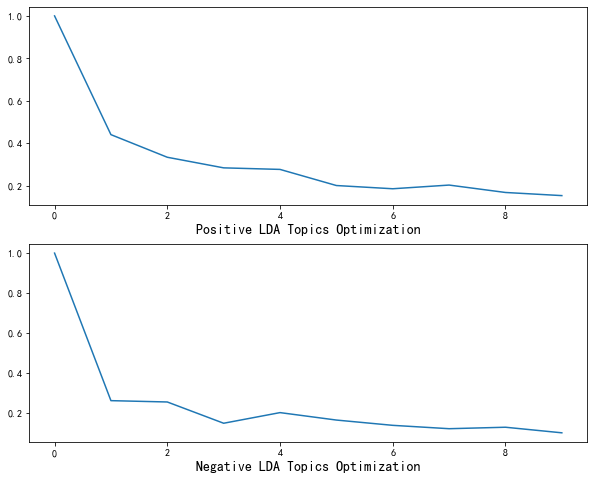

In [26]:
def cos(vector1, vector2):
    dot_product = 0.0;  
    normA = 0.0;  
    normB = 0.0;  
    for a,b in zip(vector1, vector2): 
        dot_product += a*b  
        normA += a**2  
        normB += b**2  
    if normA == 0.0 or normB==0.0:  
        return(None)  
    else:  
        return(dot_product / ((normA*normB)**0.5))   

def lda_k(x_corpus, x_dict):  
    
    mean_similarity = []
    mean_similarity.append(1)
    
    for i in np.arange(2,11):
        lda = models.LdaModel(x_corpus, num_topics=i, id2word=x_dict)  # LDA模型训练
        for j in np.arange(i):
            term = lda.show_topics(num_words=50)
            
        top_word = []
        for k in np.arange(i):
            top_word.append([''.join(re.findall('"(.*)"',i)) \
                           for i in term[k][1].split('+')])  
           
        word = sum(top_word,[])     
        unique_word = set(word)  
        
   
        mat = []
        for j in np.arange(i):
            top_w = top_word[j]
            mat.append(tuple([top_w.count(k) for k in unique_word]))  
            
        p = list(itertools.permutations(list(np.arange(i)),2))
        l = len(p)
        top_similarity = [0]
        for w in np.arange(l):
            vector1 = mat[p[w][0]]
            vector2 = mat[p[w][1]]
            top_similarity.append(cos(vector1, vector2))
      
        mean_similarity.append(sum(top_similarity)/l)
    return(mean_similarity)
            
pos_k = lda_k(pos_corpus, pos_dict)
neg_k = lda_k(neg_corpus, neg_dict)        
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  
font = FontProperties(size=14)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax1.plot(pos_k)
ax1.set_xlabel('Positive LDA Topics Optimization', fontproperties=font)

ax2 = fig.add_subplot(212)
ax2.plot(neg_k)
ax2.set_xlabel('Negative LDA Topics Optimization', fontproperties=font)


Bad key "text.kerning_factor" on line 4 in
C:\Users\qinpei\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


Text(0.5, 0, 'Negative LDA Topics Optimization')

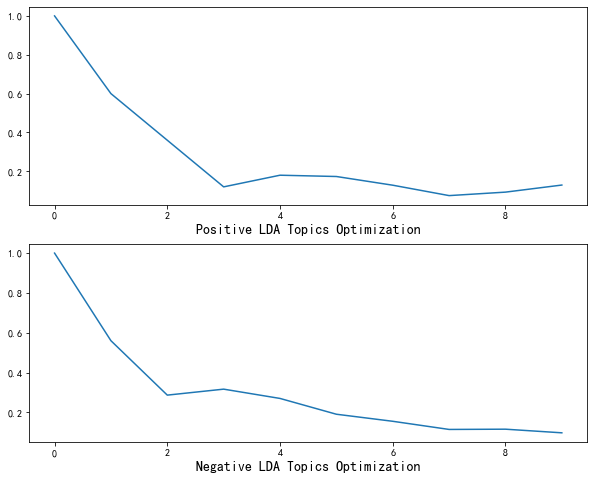

In [18]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  
font = FontProperties(size=14)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax1.plot(pos_k)
ax1.set_xlabel('Positive LDA Topics Optimization', fontproperties=font)

ax2 = fig.add_subplot(212)
ax2.plot(neg_k)
ax2.set_xlabel('Negative LDA Topics Optimization', fontproperties=font)

In [28]:
pos_lda = models.LdaModel(pos_corpus, num_topics=9, id2word=pos_dict)  
neg_lda = models.LdaModel(neg_corpus, num_topics=9, id2word=neg_dict)  
pos_lda.print_topics(num_words=10)
neg_lda.print_topics(num_words=10)

[(0,
  '0.015*"american" + 0.007*"german" + 0.007*"japanese" + 0.006*"british" + 0.006*"white" + 0.006*"army" + 0.006*"history" + 0.006*"years" + 0.006*"black" + 0.006*"battle"'),
 (1,
  '0.031*"horror" + 0.011*"killer" + 0.011*"films" + 0.008*"dead" + 0.007*"gore" + 0.006*"good" + 0.006*"blood" + 0.006*"house" + 0.005*"evil" + 0.005*"story"'),
 (2,
  '0.014*"action" + 0.008*"like" + 0.007*"fight" + 0.005*"series" + 0.004*"effects" + 0.004*"time" + 0.004*"world" + 0.004*"plot" + 0.004*"space" + 0.004*"alien"'),
 (3,
  '0.012*"like" + 0.008*"girl" + 0.007*"scene" + 0.005*"woman" + 0.005*"gets" + 0.005*"mother" + 0.005*"little" + 0.005*"going" + 0.004*"time" + 0.004*"know"'),
 (4,
  '0.013*"para" + 0.011*"como" + 0.011*"steve" + 0.007*"película" + 0.007*"pero" + 0.005*"esta" + 0.004*"filme" + 0.004*"todo" + 0.004*"este" + 0.004*"historia"'),
 (5,
  '0.009*"character" + 0.008*"director" + 0.008*"characters" + 0.007*"scenes" + 0.006*"films" + 0.006*"story" + 0.005*"work" + 0.005*"cast" + 0

In [29]:
pos_lda.print_topics(num_words=10)

[(0,
  '0.011*"character" + 0.009*"performance" + 0.009*"role" + 0.008*"cast" + 0.007*"great" + 0.005*"michael" + 0.005*"characters" + 0.004*"action" + 0.004*"screen" + 0.004*"performances"'),
 (1,
  '0.033*"best" + 0.030*"great" + 0.018*"story" + 0.018*"watch" + 0.018*"amazing" + 0.016*"time" + 0.016*"movies" + 0.016*"seen" + 0.015*"acting" + 0.012*"love"'),
 (2,
  '0.008*"story" + 0.006*"time" + 0.006*"heath" + 0.005*"like" + 0.004*"world" + 0.004*"character" + 0.004*"characters" + 0.003*"little" + 0.003*"work" + 0.003*"years"'),
 (3,
  '0.026*"best" + 0.019*"braveheart" + 0.010*"scottish" + 0.010*"oscar" + 0.010*"picture" + 0.009*"american" + 0.008*"office" + 0.007*"academy" + 0.007*"musical" + 0.007*"award"'),
 (4,
  '0.033*"joker" + 0.026*"batman" + 0.013*"nolan" + 0.012*"dark" + 0.012*"knight" + 0.012*"like" + 0.009*"time" + 0.009*"scene" + 0.007*"bale" + 0.007*"best"'),
 (5,
  '0.024*"like" + 0.024*"good" + 0.011*"great" + 0.011*"story" + 0.011*"think" + 0.010*"movies" + 0.009*"